In [1]:
import model_diagnostic_utils as md
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('Titanic_train.csv')

df = pd.get_dummies(df,columns=['Sex'])
features = ['Pclass','Age','Sex_female','Fare']
target = 'Survived'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X.reset_index(drop=True), y.reset_index(drop=True), test_size=0.33, random_state=42)

In [13]:
dir_results_files = 'results_files'
dir_models = 'models'

model_id = 'Your_user_name-21213528'
model_id2 = 'Your_user_name-21213533'

umbral_elegido = 0.5
umbral_elegido2 = 0.5

limit_imp = 5

model_name = 'Model 1'
model_name2 = 'Model 2'

data_for_comparison = df[list(X_train.columns)+[target]]


===== Mostrando Las metricas del modelo

=== Model 1
Tipo_metrica          Clasificacion
Tipo_modelo                       1
Algoritmo             XGBClassifier
umbral                          0.5
AUC                        0.841667
Gini                       0.683333
F1_score                   0.761797
Accuracy                   0.772881
Recall                     0.762738
Precision                  0.765568
Fecha           2023-02-21 21:35:00
Comentario                      NaN
Name: Your_user_name-21213528, dtype: object

== Confusion matrix
--- Absoluto


true_positive      85
true_negative     158
false_positive     17
false_negative     35
Name: result, dtype: int64


--- Relativo


true_positive     0.2881
true_negative     0.5356
false_positive    0.0576
false_negative    0.1186
Name: result, dtype: float64


=== Model 2
Tipo_metrica          Clasificacion
Tipo_modelo                       1
Algoritmo             XGBClassifier
umbral                          0.5
AUC                         0.82381
Gini                       0.647619
F1_score                   0.738584
Accuracy                   0.749153
Recall                     0.740119
Precision                  0.740949
Fecha           2023-02-21 21:35:00
Comentario                      NaN
Name: Your_user_name-21213533, dtype: object

== Confusion matrix
--- Absoluto


true_positive      88
true_negative     150
false_positive     25
false_negative     32
Name: result, dtype: int64


--- Relativo


true_positive     0.2983
true_negative     0.5085
false_positive    0.0847
false_negative    0.1085
Name: result, dtype: float64



===== Mostrando el feature importance by gini

=== Model 1


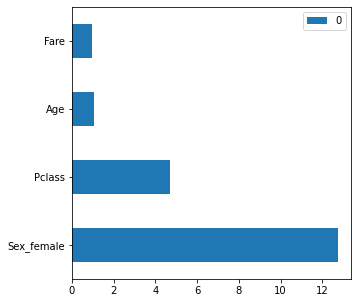


=== Model 2


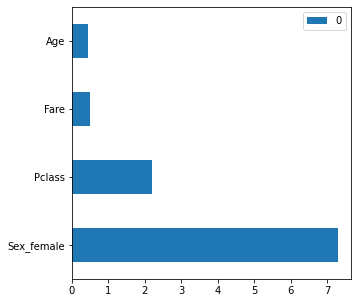


===== Mostrando la calibracion del modelo



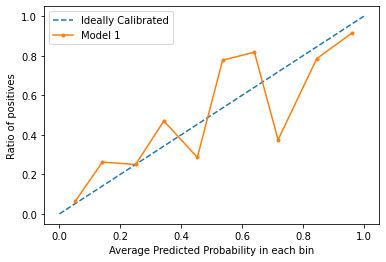

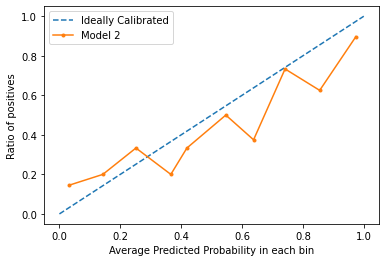


===== Comparando la distribucion de los features

Pclass
Media Data Training: 2.337248322147651 
 Media Data comparison: 2.308641975308642


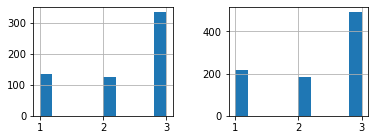

Con Pclass SON IGUALES

-----------------------------

Age
Media Data Training: 29.525983263598327 
 Media Data comparison: 29.69911764705882


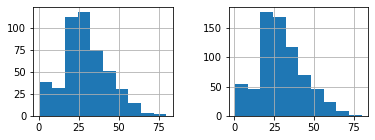

Con Age SON IGUALES

-----------------------------

Sex_female
Media Data Training: 0.34563758389261745 
 Media Data comparison: 0.35241301907968575


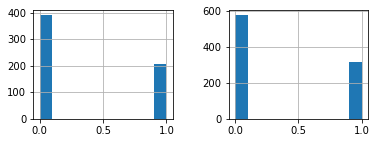

Con Sex_female SON IGUALES

-----------------------------

Fare
Media Data Training: 24.70657053726167 
 Media Data comparison: 24.517521586931093


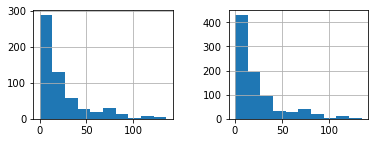

Con Fare SON IGUALES

-----------------------------


====== Creating shap values

Sampling dataset

Truncating outliers

====== Creating TREE shap values

======== TREE show_global_explainer


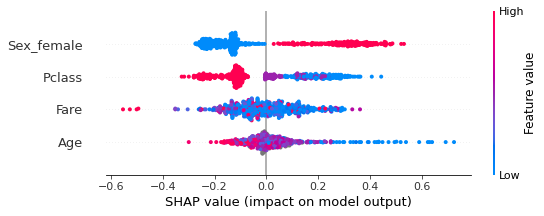


======== show_partial_dependence_plot
Sex_female 0.9456602346874674


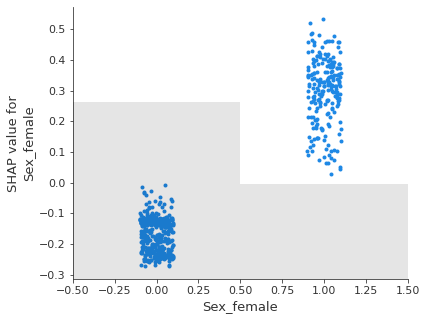

Pclass -0.9117927182303077


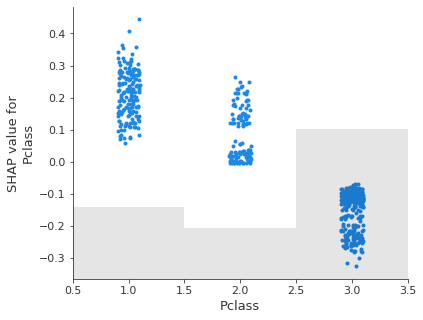

Age -0.5633727343523625


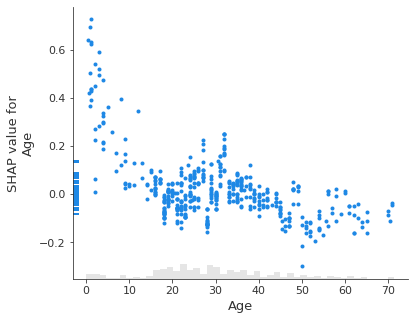

Fare -0.1634169737051096


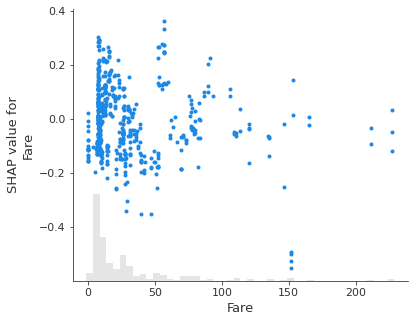


======== show_local_explainer_plot by type of prediction
###  pred_q_(0.0, 0.25]

=== pred_q_(0.0, 0.25] | Registro #:  4
Series([], Name: 0, dtype: float64)

Prediction:  0.084


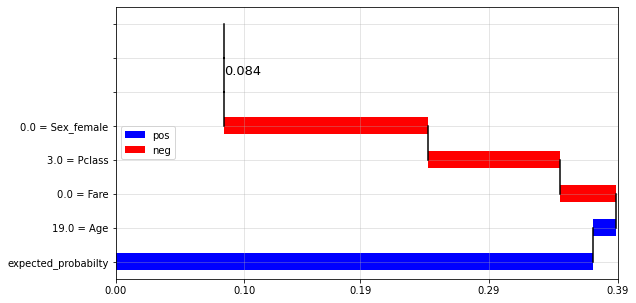

=== pred_q_(0.0, 0.25] | Registro #:  5
Series([], Name: 1, dtype: float64)

Prediction:  0.077


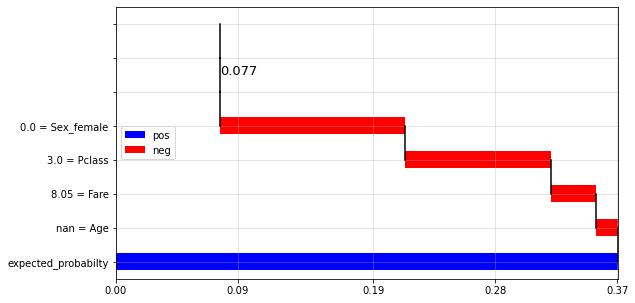

=== pred_q_(0.0, 0.25] | Registro #:  0
Series([], Name: 2, dtype: float64)

Prediction:  0.734


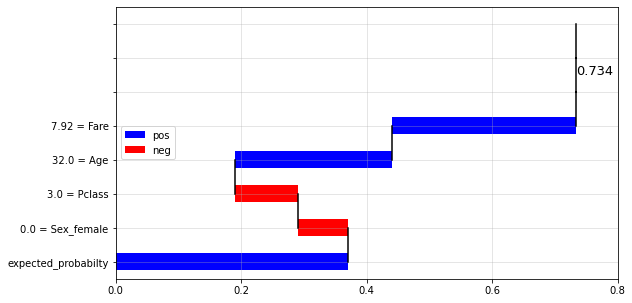

###  pred_q_(0.5, 0.75]

###  pred_q_(0.75, 1.0]

=== pred_q_(0.75, 1.0] | Registro #:  1
Series([], Name: 0, dtype: float64)

Prediction:  0.084


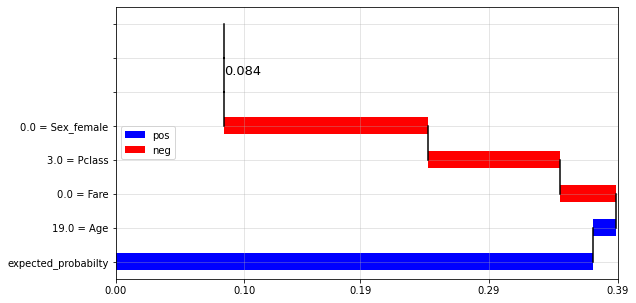

=== pred_q_(0.75, 1.0] | Registro #:  3
Series([], Name: 1, dtype: float64)

Prediction:  0.077


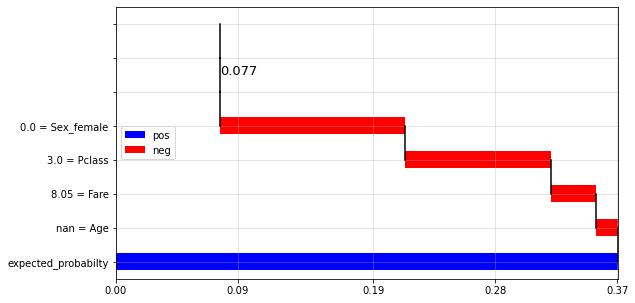

###  pred_q_(0.25, 0.5]

=== pred_q_(0.25, 0.5] | Registro #:  2
Series([], Name: 0, dtype: float64)

Prediction:  0.084


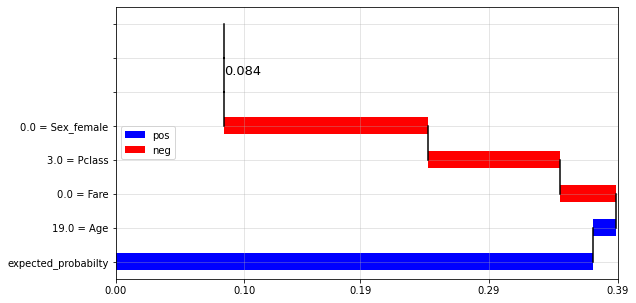

In [17]:
dicc_return = md.model_diagnostic(X_train,
                    y_train,
                    X_test,
                    y_test,
                    target,
                    dir_results_files,
                    dir_models,
                    model_id,
                    model_id2,
                    umbral_elegido,
                    umbral_elegido2,
                    limit_imp,
                    model_name,
                    model_name2,
                    data_for_comparison,
                    porcentaje_df_sample=0.7,
                    existing_shap_values=None,
                    existing_df_shap_values=None,
                    existing_shap_values_df_compare=None,
                    existing_df_shap_values_df_compare=None,
                    truncate_out = 1,
                    skew_validation_out_shap = 0,
                    use_normal_shap=0,
                    sample_size_local_shap = 6,
                    specific_rows_local_shap = [0,1,2,3,4,5],
                    return_model_metrics=1,
                    return_feature_importance_gini=1,
                    return_model_calibration_curve=1,
                    return_compare_data_dist=1,
                    return_performance_by_segment=0,
                    return_profiling_false_negatives=0,
                    return_shap=1,
                    return_shap_df_compare=0,
                    return_feature_importance_by_perm=0,
                    )